- **Instruções** <br>
Turma: MSP 11924-TBABD-T1
Disciplina: Análise Preditiva Avançada (Professores Mirapalheta e Hitoshi)</br>

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal?</br>

- **Questão 2:** <br>
Resolva o mesmo problema da Questão 1 utilizando o algoritmo Random Forests. Tentem trabalhar a hiperparametrização para aumento do desempenho. Compare o seu melhor resultado com o resultado obtido na Questão 1 e comente.</br>

- **Anti-plágio** <br>
Anti-plágio ativado</br>

- **Data Final** <br>
8 de junho de 2020 23:59</br>

In [1]:
!pip install tensorflow-datasets

     |████████████████████████████████| 3.3 MB 3.5 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report


- **Questão 1:** <br>
<span style="color:red"><strong>Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial</strong></span style="color:red">, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

In [3]:
x_train, y_train = tfds.as_numpy(tfds.load(
    'mnist', 
    batch_size = -1,
    split = 'train',
    as_supervised = True,
))

x_test, y_test = tfds.as_numpy(tfds.load(
    'mnist', 
    batch_size = -1,
    split = 'test',
    as_supervised = True,
))



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
random.seed(1729)
np.random.seed(1729)
tf.random.set_seed(1729)

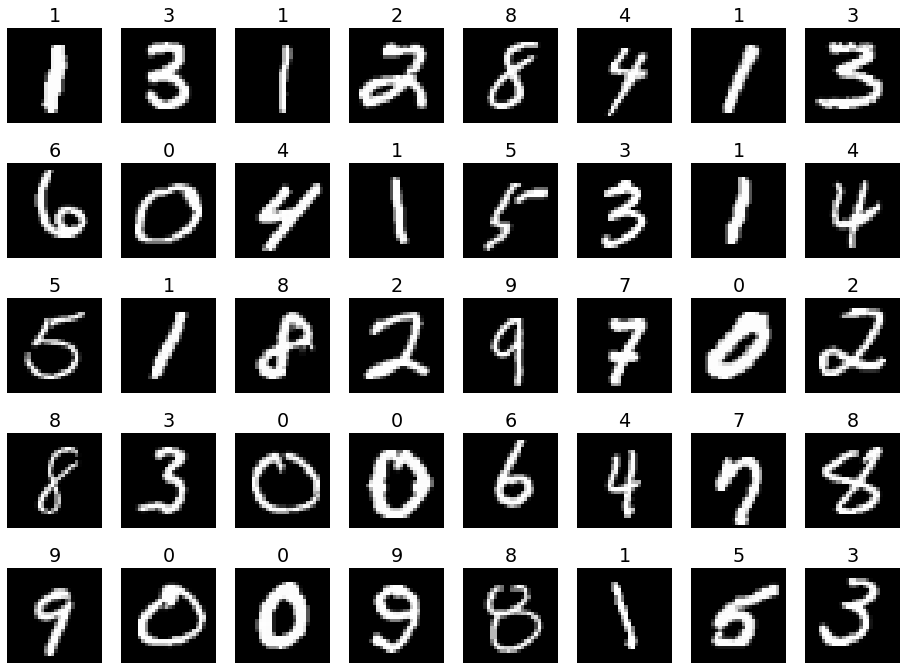

In [5]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize = (16, 12))
columns = 8
rows    = 5

for i in range(1, columns * rows + 1):
    rnd = np.random.randint(0, len(x_train))
    img = np.reshape(x_train[rnd], (28, 28))
    fig.add_subplot(rows, columns, i)
    plt.title(y_train[rnd])
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')

plt.show()

In [6]:
x_train / 255
y_train / 255

y_train = np.expand_dims(y_train, axis = 1)
y_test  = np.expand_dims(y_test, axis = 1)

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, <span style="color:red"><strong>apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede.</strong></span style="color:red"> Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

In [7]:
i = Input(x_train.shape[1:])

a = Flatten()(i)

a = Dense(512, activation = 'relu')(a)
a = Dropout(0.3)(a)

a = Dense(10, activation = 'softmax')(a)

model_NNS = Model(i ,a)

In [8]:
model_NNS.compile(optimizer = 'rmsprop',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model_NNS.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. <span style="color:red"><strong>Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste.</strong></span style="color:red"> Qual o número de camadas que você consideraria ideal? </br>

In [9]:
i = Input(x_train.shape[1:])

b = Flatten()(i)

b = Dense(512, activation = 'relu')(b)
b = Dropout(0.3)(b)

b = Dense(256, activation = 'relu')(b)
b = Dropout(0.2)(b)

b = Dense(128, activation = 'relu')(b)
b = Dropout(0.2)(b)

b = Dense(64, activation = 'relu')(b)
b = Dropout(0.2)(b)

b = Dense(10, activation = 'softmax')(b)

model_NNC = Model(i ,b)

In [10]:
model_NNC.compile(optimizer = 'rmsprop',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model_NNC.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3289

In [11]:
i = Input(x_train.shape[1:])

c = Conv2D(32, (3,3), activation ='relu', padding = 'same')(i)
c = BatchNormalization()(c)
c = Conv2D(32, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = MaxPooling2D(2,2)(c)

c = Conv2D(64, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = Conv2D(64, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = MaxPooling2D(2,2)(c)

c = Conv2D(128, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = Conv2D(128, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = MaxPooling2D(2,2)(c)

c = Conv2D(256, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = Conv2D(256, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = MaxPooling2D(2,2)(c)

c = Flatten()(c)

c = Dense(512, activation = 'relu')(c)
c = Dropout(0.3)(c)

c = Dense(256, activation = 'relu')(c)
c = Dropout(0.2)(c)

c = Dense(128, activation = 'relu')(c)
c = Dropout(0.2)(c)

c = Dense(64, activation = 'relu')(c)
c = Dropout(0.2)(c)

c = Dense(10, activation = 'softmax')(c)

model_CNN = Model(i, c)

In [12]:
model_CNN.compile(optimizer = 'rmsprop',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model_CNN.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1849

In [13]:
batch_size = 2048

train_gen = ImageDataGenerator(rotation_range = 10,
                               horizontal_flip = False,
                               vertical_flip = False,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rescale = 1.,
                               zoom_range = 0.2,
                               fill_mode = 'nearest',
                               cval = 0)

train_generator_NNS = train_gen.flow(x_train, y_train, batch_size)
train_generator_NNC = train_gen.flow(x_train, y_train, batch_size)
train_generator_CNN = train_gen.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size

checkpoint_NNS = ModelCheckpoint('model_NNS.h5', 
                                 monitor = 'val_loss', 
                                 verbose = 1, 
                                 save_best_only = True, 
                                 mode = 'auto')

checkpoint_NNC = ModelCheckpoint('model_NNC.h5', 
                                 monitor = 'val_loss', 
                                 verbose = 1, 
                                 save_best_only = True, 
                                 mode = 'auto')

checkpoint_CNN = ModelCheckpoint('model_CNN.h5', 
                                 monitor = 'val_loss', 
                                 verbose = 1, 
                                 save_best_only = True, 
                                 mode = 'auto')

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados. <span style="color:red"><strong>após 50 épocas de treino.</strong></span style="color:red"> Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

In [14]:
epochs = 50

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. <span style="color:red"><strong>Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre.</strong></span style="color:red"> Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

In [15]:
history_NNS = model_NNS.fit(train_generator_NNS, 
                            validation_data = (x_test, y_test), 
                            steps_per_epoch = steps_per_epoch, 
                            epochs = epochs,
                            callbacks = [checkpoint_NNS])

Train for 29 steps, validate on 10000 samples
Epoch 1/50
28/29 [===========================>..] - ETA: 0s - loss: 59.6811 - accuracy: 0.4639
Epoch 00001: val_loss improved from inf to 3.89254, saving model to model_NNS.h5
29/29 [==============================] - 14s 498ms/step - loss: 57.8771 - accuracy: 0.4693 - val_loss: 3.8925 - val_accuracy: 0.8038
Epoch 2/50
28/29 [===========================>..] - ETA: 0s - loss: 5.8665 - accuracy: 0.6739
Epoch 00002: val_loss improved from 3.89254 to 1.42432, saving model to model_NNS.h5
29/29 [==============================] - 15s 507ms/step - loss: 5.7761 - accuracy: 0.6737 - val_loss: 1.4243 - val_accuracy: 0.8027
Epoch 3/50
28/29 [===========================>..] - ETA: 0s - loss: 1.9672 - accuracy: 0.6796
Epoch 00003: val_loss improved from 1.42432 to 0.76956, saving model to model_NNS.h5
29/29 [==============================] - 15s 522ms/step - loss: 1.9428 - accuracy: 0.6805 - val_loss: 0.7696 - val_accuracy: 0.8069
Epoch 4/50
28/29 [=====

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. <span style="color:red"><strong>Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste.</strong></span style="color:red"> Qual o número de camadas que você consideraria ideal? </br>

In [16]:
history_NNC = model_NNC.fit(train_generator_NNC, 
                            validation_data = (x_test, y_test), 
                            steps_per_epoch = steps_per_epoch, 
                            epochs = epochs,
                            callbacks = [checkpoint_NNC])

Train for 29 steps, validate on 10000 samples
Epoch 1/50
28/29 [===========================>..] - ETA: 0s - loss: 14.6290 - accuracy: 0.1711
Epoch 00001: val_loss improved from inf to 1.98068, saving model to model_NNC.h5
29/29 [==============================] - 15s 503ms/step - loss: 14.2411 - accuracy: 0.1721 - val_loss: 1.9807 - val_accuracy: 0.2879
Epoch 2/50
28/29 [===========================>..] - ETA: 0s - loss: 2.5180 - accuracy: 0.2343
Epoch 00002: val_loss improved from 1.98068 to 1.70285, saving model to model_NNC.h5
29/29 [==============================] - 14s 482ms/step - loss: 2.5032 - accuracy: 0.2370 - val_loss: 1.7029 - val_accuracy: 0.5154
Epoch 3/50
28/29 [===========================>..] - ETA: 0s - loss: 1.8153 - accuracy: 0.4041
Epoch 00003: val_loss improved from 1.70285 to 0.93097, saving model to model_NNC.h5
29/29 [==============================] - 15s 517ms/step - loss: 1.8083 - accuracy: 0.4064 - val_loss: 0.9310 - val_accuracy: 0.7442
Epoch 4/50
28/29 [=====

In [17]:
history_CNN = model_CNN.fit(train_generator_CNN, 
                            validation_data = (x_test, y_test), 
                            steps_per_epoch = steps_per_epoch, 
                            epochs = epochs,
                            callbacks = [checkpoint_CNN])

Train for 29 steps, validate on 10000 samples
Epoch 1/50
28/29 [===========================>..] - ETA: 0s - loss: 1.3761 - accuracy: 0.5268
Epoch 00001: val_loss improved from inf to 1.55276, saving model to model_CNN.h5
29/29 [==============================] - 22s 743ms/step - loss: 1.3401 - accuracy: 0.5409 - val_loss: 1.5528 - val_accuracy: 0.4721
Epoch 2/50
28/29 [===========================>..] - ETA: 0s - loss: 0.2313 - accuracy: 0.9432
Epoch 00002: val_loss improved from 1.55276 to 0.62638, saving model to model_CNN.h5
29/29 [==============================] - 16s 568ms/step - loss: 0.2279 - accuracy: 0.9441 - val_loss: 0.6264 - val_accuracy: 0.8638
Epoch 3/50
28/29 [===========================>..] - ETA: 0s - loss: 0.1534 - accuracy: 0.9653
Epoch 00003: val_loss improved from 0.62638 to 0.36347, saving model to model_CNN.h5
29/29 [==============================] - 16s 543ms/step - loss: 0.1515 - accuracy: 0.9658 - val_loss: 0.3635 - val_accuracy: 0.8740
Epoch 4/50
28/29 [=======

In [18]:
model_NNS = tf.keras.models.load_model('model_NNS.h5')
model_NNC = tf.keras.models.load_model('model_NNC.h5')
model_CNN = tf.keras.models.load_model('model_CNN.h5')

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. <span style="color:red"><strong>Qual o número de camadas que você consideraria ideal?</strong></span style="color:red"> </br>

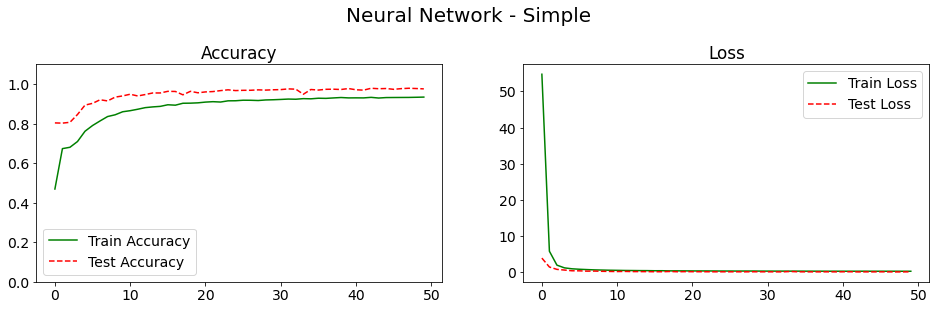

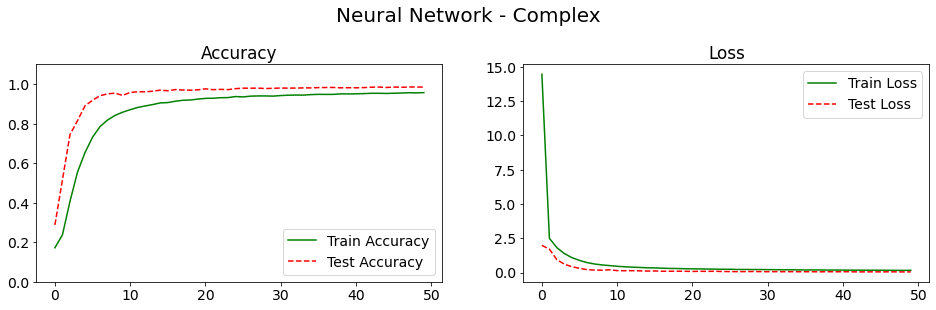

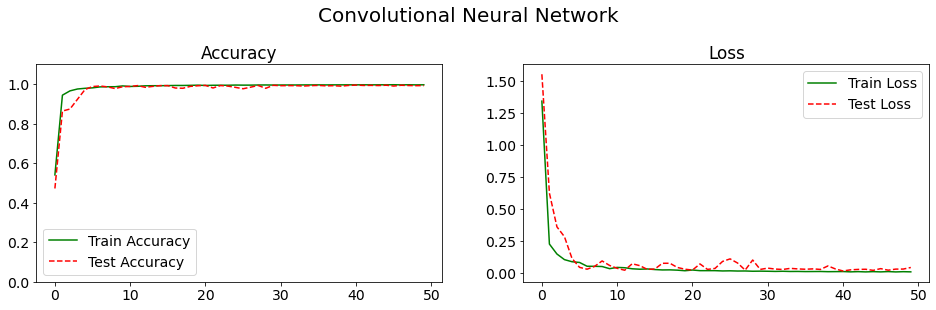

In [19]:
def plot_accuracy_hist(model_history, fig_tittle):

    plt.rcParams.update({'font.size': 14})

    fig = plt.figure(figsize = (16, 4))
    columns = 2
    rows = 1

    fig.suptitle(fig_tittle, fontsize = 20, y = 1.08)
    fig.add_subplot(rows, columns, 1)

    plt.title('Accuracy')
    plt.ylim(0, 1.1)
    
    plt.plot(model_history.history['accuracy'], 
             color='green', 
             label = 'Train Accuracy')

    plt.plot(model_history.history['val_accuracy'], 
             color='red', 
             label = 'Test Accuracy', 
             linestyle='dashed')

    plt.legend()

    fig.add_subplot(rows, columns, 2)

    plt.title('Loss')
    plt.plot(model_history.history['loss'], 
             color='green', 
             label = 'Train Loss')

    plt.plot(model_history.history['val_loss'], 
             color='red', 
             label = 'Test Loss', 
             linestyle='dashed')

    plt.legend()

    plt.show()

plot_accuracy_hist(history_NNS, 'Neural Network - Simple')
plot_accuracy_hist(history_NNC, 'Neural Network - Complex')
plot_accuracy_hist(history_CNN, 'Convolutional Neural Network')


In [20]:
def pred(model, x_test):
    pred_prob = model.predict(x_test)
    pred = np.argmax(pred_prob, axis = 1)
    return pred

print('Classification Report - Neural Network - Simple')
print(classification_report(np.argmax(y_test, axis = 1), pred(model_NNS, x_test)))

print('Classification Report - Neural Network - Complex')
print(classification_report(np.argmax(y_test, axis = 1), pred(model_NNC, x_test)))

print('\nClassification Report - Convolutional Neural Network')
print(classification_report(np.argmax(y_test, axis = 1), pred(model_CNN, x_test)))



Classification Report - Neural Network - Simple
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Classification Report - Neural Network - Complex
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99  

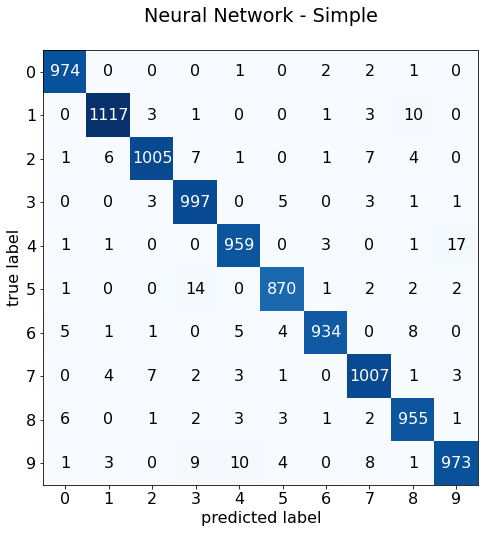

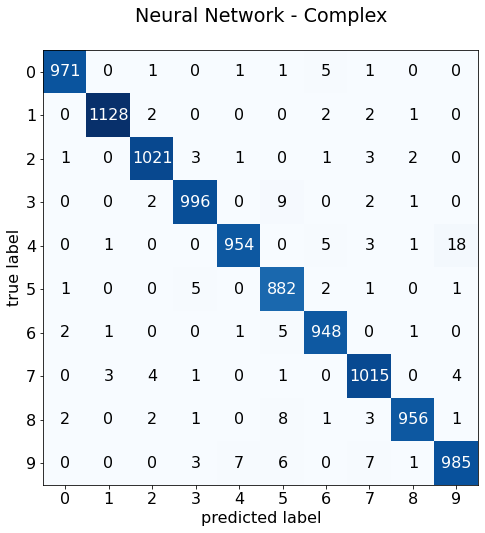

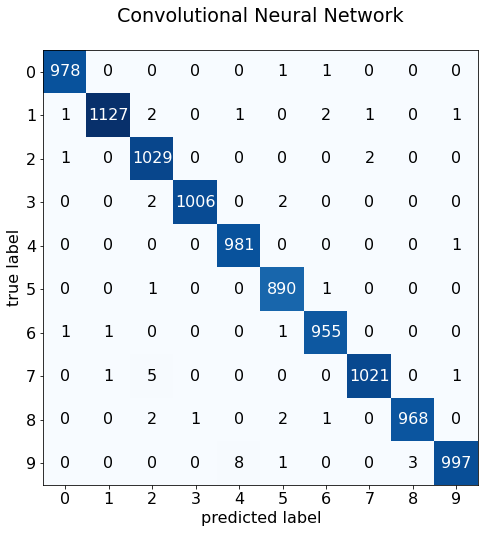

In [21]:
plt.rcParams.update({'font.size': 16})

def plot_confusion_mtx(model, x_test, plot_tittle):
    pred_prob = model.predict(x_test)
    pred = np.argmax(pred_prob, axis = 1)

    CM = confusion_matrix(np.argmax(y_test, axis = 1), pred)

    plot_confusion_matrix(conf_mat = CM, figsize = (16, 8))
    plt.title(plot_tittle)
    plt.xticks(range(10), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.yticks(range(10), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    plt.show()

plot_confusion_mtx(model_NNS, x_test, 'Neural Network - Simple')
plot_confusion_mtx(model_NNC, x_test, 'Neural Network - Complex')
plot_confusion_mtx(model_CNN, x_test, 'Convolutional Neural Network')

In [22]:
y_true = np.argmax(y_test, axis = 1)
pred_prob = model_CNN.predict(x_test)
y_pred = np.argmax(pred_prob, axis = 1)
errors = (y_pred - y_true != 0)
hits = (y_pred - y_true == 0)

In [23]:
y_test_erros  = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_test_hits  = y_pred[hits]
y_true_hits = y_true[hits]
x_test_hits = x_test[hits]

In [24]:
print('quantidade de erros: \t' + str(len(y_test_erros)))
print('quantidade de hits: \t' + str(len(y_test_hits)))

quantidade de erros: 	48
quantidade de hits: 	9952


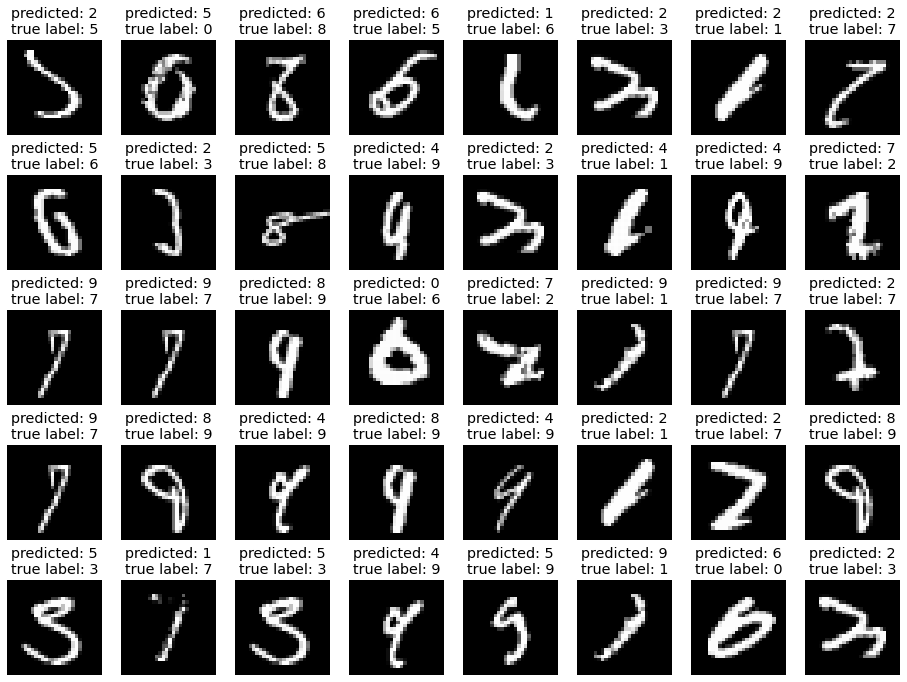

In [25]:
plt.rcParams.update({'font.size': 12})

fig = plt.figure(figsize = (16, 12))
columns = 8
rows = 5

for i in range(1, columns * rows + 1):
    rnd = np.random.randint(0, len(x_test_errors))
    img = np.reshape(x_test_errors[rnd], (28, 28))
    fig.add_subplot(rows, columns, i)
    plt.title('predicted: ' + str(y_test_erros[rnd]) + '\ntrue label: ' + str(y_true_errors[rnd]))
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')

plt.show()

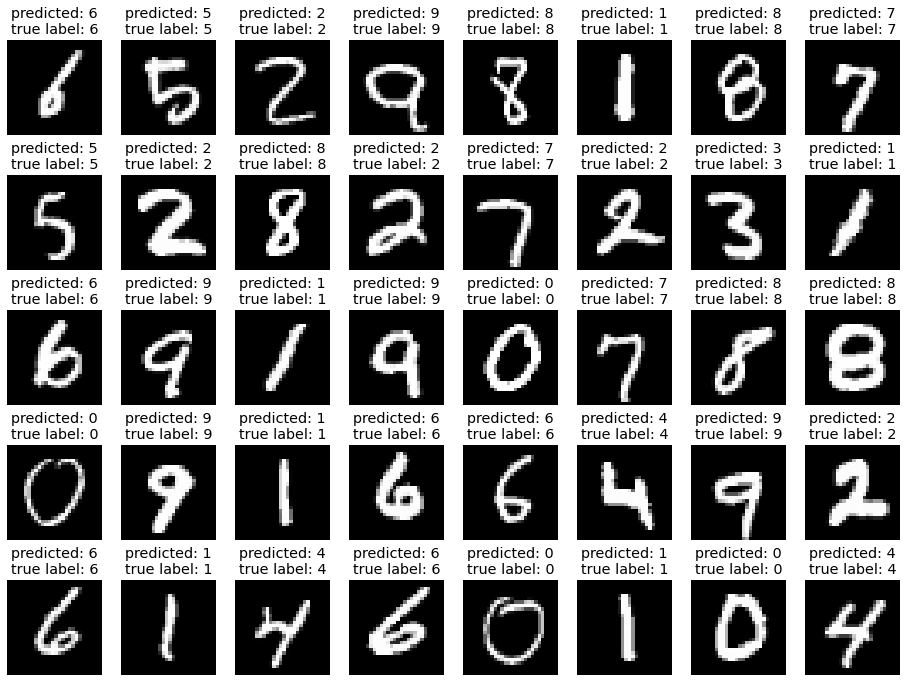

In [26]:
plt.rcParams.update({'font.size': 12})

fig = plt.figure(figsize = (16, 12))
columns = 8
rows = 5

for i in range(1, columns * rows + 1):
    rnd = np.random.randint(0, len(x_test_hits))
    img = np.reshape(x_test_hits[rnd], (28, 28))
    fig.add_subplot(rows, columns, i)
    plt.title('predicted: ' + str(y_test_hits[rnd]) + '\ntrue label: ' + str(y_true_hits[rnd]))
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')

plt.show()

- **Questão 2:** <br>
Resolva o mesmo problema da Questão 1 utilizando o algoritmo Random Forests. Tentem trabalhar a hiperparametrização para aumento do desempenho. Compare o seu melhor resultado com o resultado obtido na Questão 1 e comente.</br>